In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# les données du tableau excel
file_path = 'fichier_gap.xlsx'
df = pd.read_excel(file_path)
gap_homo_lumo = df['Gap'].dropna()

In [4]:
gap_homo_lumo

0       0.25559
1       0.18148
2       0.17856
3       0.13496
4       0.15926
         ...   
8387    0.12177
8388    0.12853
8389    0.13874
8390    0.00976
8391    0.09570
Name: Gap, Length: 8392, dtype: float64

In [5]:
# Conversion 1 Ha = 27.2114 eV
Ha_to_eV = 27.2114

In [6]:
# Convertir les gaps en eV
gap_homo_lumo_ev = gap_homo_lumo * Ha_to_eV

# les valeurs min/max du gap et intervalles en eV
gap_min_ev = gap_homo_lumo_ev.min()
gap_max_ev = gap_homo_lumo_ev.max()
increment_ev = (gap_max_ev - gap_min_ev) / 10

In [7]:
# Intervalle du gap et le decompt des Benzenoides
intervals_ev = [(gap_min_ev + i * increment_ev, gap_min_ev + (i + 1) * increment_ev) for i in range(10)]

counts_ev = {
    f"[{round(interval[0], 2)}:{round(interval[1], 2)}[": 0 
    for interval in intervals_ev
}

for gap_ev in gap_homo_lumo_ev:
    for i, interval in enumerate(intervals_ev):
        if interval[0] <= gap_ev <= interval[1]:
            counts_ev[f"[{round(interval[0], 2)}:{round(interval[1], 2)}["] += 1
            break


In [8]:
result_df_ev = pd.DataFrame(
    list(counts_ev.items()), 
    columns=["Intervalle (eV)", "Nombre de Benzénoïdes"]
)

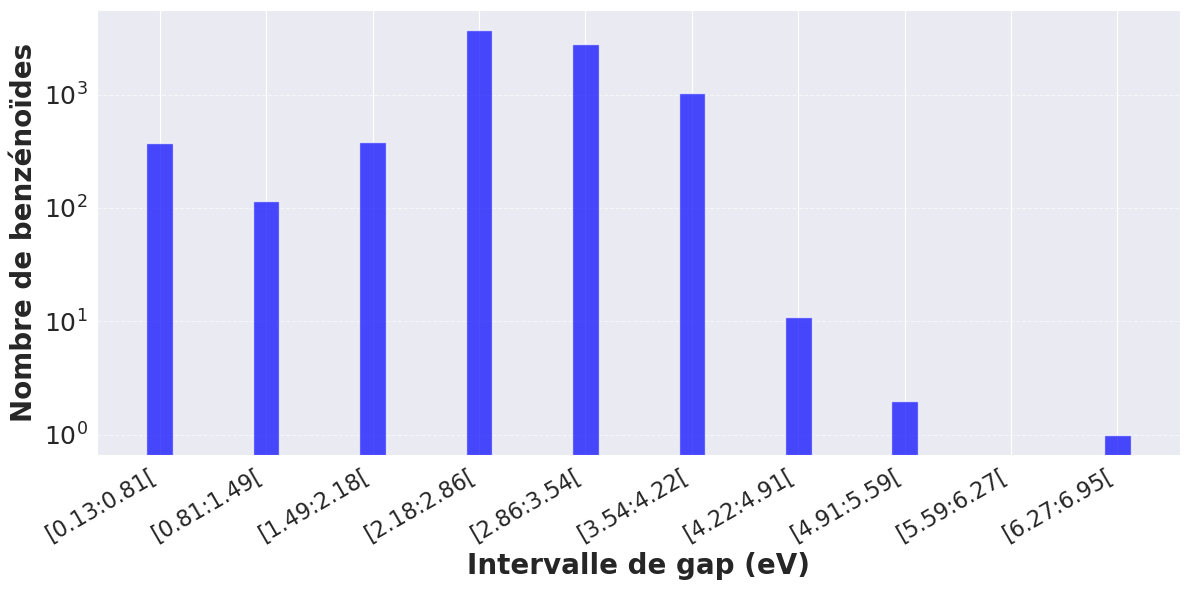

In [13]:
# Données pour le graphique
Intervalle_Gap_ev = result_df_ev['Intervalle (eV)']
Benzenoides = result_df_ev['Nombre de Benzénoïdes']

# Tracé du graphique
largeur_barre = 0.25
x = np.arange(len(Intervalle_Gap_ev))
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))  # Ajustement de la taille pour une meilleure lisibilité

plt.bar(
    x, 
    Benzenoides, 
    width=largeur_barre, 
    color='blue', 
    alpha=0.7, 
    label="Benzénoïdes"
)

# Personnalisation des axes et du titre
plt.yscale('log')
plt.xlabel("Intervalle de gap (eV)", fontsize=20, fontweight='bold')
plt.ylabel("Nombre de benzénoïdes", fontsize=20, fontweight='bold')
#plt.title("Distribution des Benzénoïdes par Intervalle de Gap (eV)", fontsize=14, fontweight='bold')

plt.xticks(ticks=x, labels=Intervalle_Gap_ev, rotation=30, ha='right', fontsize=16)
plt.yticks(fontsize=18)
#plt.legend(fontsize=10)

# Améliorations esthétiques
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()  # Évite les chevauchements
plt.savefig("Gap.png", dpi=300, bbox_inches='tight')
plt.show()